<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Metodos_regularizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENGF21

## Regularização

O procedimento de regularização (regularization) visa evitar que o modelo sobreajuste os dados e portanto lida com os problemas de alta variância. A tabela a seguir resume os diferentes tipos de técnicas de regularização comumente utilizadas:

### LASSO

- Diminui coeficientes para $0$
- Bom para seleção de variáveis

### Ridge 

- Faz o coeficiente menor

### Elastic Net 

- Balanço entre seleção de variáveis e coeficientes pequenos

https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks   

Quais são as principais questões enfrentadas ao trabalhar com inferência de parâmetros de modelos?

- Underfitting	
- Just right	
- Overfitting

Esta ideia pode ser melhor explorada se começarmos com  dados aletórios de modelo linear com a seguinte estrutura 

$Y = f(x) + \epsilon$

onde

 - $Y$ é uma variável aleatória, 

 - $x$ uma  variável preditora e 

 - $\epsilon$ o erro aleatório.

 Enquanto $f(x)$ é a estrutura do modelo, que aqui adotaremos como linear

 $f(x) = \beta_0 + \beta_1 x$, portanto neste neste problema temos dois parâmetros a ser estimado: 

$\beta_0$ e $\beta_1$. 

Para uma boa compreensão desse problema é necessário que pensamos no seguinte aspecto, para a estimativa desses parâmetros de um modelo linear pelo método clássico dos mínimos quadrados é definido pela equação 

$\min L(\beta_0,\beta_1) = \min \sum_{i=1}^{n} (y_i-f(x_i))^2$


conhecida a solução analítica: 

$\hat{\beta_1} = \frac{\sum_{i=1}^{n} y_i (x_i-\bar{x})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$ 

$\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x} $

onde $\bar{x}$ e $\bar{y}$ são:

$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$


e

$\bar{y} = \frac{\sum_{i=1}^{n}y_i}{n}$

# Contexto histórico "Ridge Regression" 
[Ridge Regression: A Historical Context](https://www.tandfonline.com/doi/full/10.1080/00401706.2020.1742207)



# Aplicação ao campo da quimiometria

[Link para os dados e códigos do artigo](https://data.mendeley.com/datasets/gzh2z38pyh/2)



[Vídeo sobre motores de octanagem](https://www.intertek-br.com/petroleo-gas/teste-octanagem/)

# Importanto pacotes de visualização e regressão

In [1]:
# Importando os pacotes necessarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score




```
# Isto está formatado como código
```
# Carregamento de dados a partir do github

In [2]:
# Carregamento de dados do github
!git clone https://github.com/rpessoa1983/regularization.git 



Cloning into 'regularization'...
remote: Enumerating objects: 62, done.
remote: Total 62 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (62/62), done.


# Leitura do banco de dados do banco local

In [3]:
# O espectro esta na faixa de 900-1700
spectra = pd.read_csv('regularization/spectro.csv', header=None)

range(900,1700)
# O total de amostras sao 60
octane = pd.read_csv('regularization/octane.csv', header=None)

#print(octane)
octane.dtypes



0    float64
dtype: object

# Função para criar sequência de números inteiros com passo definido

In [4]:
# Solucao em https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values?rq=1 

def frange(start, stop, step=1.0):
    ''' "range()" like function which accept float type''' 
    i = start
    while i < stop:
        yield i
        i += step

# Mudança de nomes das variáveis

In [5]:
#Mudar os labels de spectra
label_spectra = list(frange(900,1701,2))
#print(label_spectra)
spectra.columns = label_spectra
preditoras = spectra.add_prefix('V_')

# Mudar o label de octane
octane.columns= list(['RON'])

#print(preditoras)
#preditoras.head()

# Exemplo de absorvancias para o comprimento de onda 
preditoras.loc[2:3,'V_1000']


#print(octane)

#octane.head()

2   -0.056419
3   -0.058185
Name: V_1000, dtype: float64

# Carregamento de funções utilizadas na aula de visualização de dados

In [6]:
# Visualização gráfica
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import cm
from wordcloud import WordCloud
import plotly.graph_objects as go
! pip install upsetplot
from upsetplot import UpSet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for upsetplot: filename=UpSetPlot-0.6.1-py3-none-any.whl size=19089 sha256=2e4cea70eb4dbb23bf06cdc343905551b5bb02b4597400bc7a99f155bcc3c55f
  Stored in directory: /root/.cache/pip/wheels/c5/b1/5a/7ba78fe55ccd48c7915805134ba69f152acae94cca3ff18e4c
Successfully built upsetplot


# Algumas manipulações de dados 

In [7]:
df = pd.concat([spectra, octane], axis=1, join='inner')

#wavelength = pd.DataFrame(label_spectra).to_numpy()
wavelength = pd.DataFrame(label_spectra).to_numpy()
absorbancia = preditoras.transpose()
absorbancia.dtypes 

ave_absorption = np.mean(spectra, axis=0)
print(type(ave_absorption))





<class 'pandas.core.series.Series'>


# Conhecendo a comportmento geral dos dados

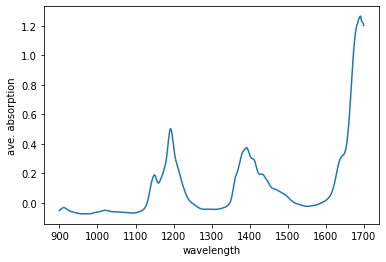

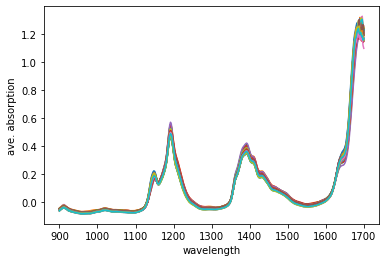

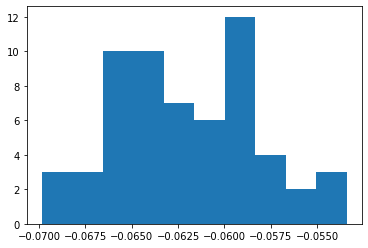

In [8]:
ave_plot = plt.plot(wavelength,ave_absorption)
plt.xlabel("wavelength")
plt.ylabel("ave. absorption")
plt.show()

ave_plot = plt.plot(spectra.transpose())
plt.xlabel("wavelength")
plt.ylabel("ave. absorption")
plt.show()

#axes1 = fig.add_subplot(1, 3, 1)
#axes2 = fig.add_subplot(1, 3, 2)
#axes3 = fig.add_subplot(1, 3, 3)


#axes1.set_ylabel('average')
#axes1.set_xlabel('wavelength')
#axes1.plot(wavelength_slice,numpy.mean(data_slice, axis=0))

#axes2.set_ylabel('max')
#axes2.set_xlabel('wavelength')
#axes2.plot(wavelength_slice,numpy.max(data_slice, axis=0))

#axes3.set_ylabel('min')
#axes3.set_xlabel('wavelength')
#axes3.plot(wavelength_slice,numpy.min(data_slice, axis=0))

#fig.tight_layout()

#matplotlib.pyplot.savefig('./group_plot.png')

#matplotlib.pyplot.show()

# Exemplo de variavel que claramente nao segue uma normal
plt.hist(preditoras.loc[:,'V_1000'],bins=10)
plt.show()



# Definição de variáveis preditoras e independentes

In [9]:
# Variaveis preditoras 
preditoras
# Variavel independente 
octane

predit_train, predit_test, octane_train, octane_test = train_test_split(preditoras,octane,test_size=0.30)

print(predit_train.shape)
print(octane_train.shape)

(42, 401)
(42, 1)


# Regressão linear pelo método de otimização numérica 

In [10]:
# Aplicacao da regressao linear classica
linearreg = LinearRegression()
linearreg.fit(predit_train,octane_train)


# Calculo do erro quadratico medio Mean Squared Error (MSE)
#linearreg_prediction = linearreg.predict(predit_test)
octane_predicted_classical = linearreg.predict(predit_test)

R_squared = r2_score(octane_predicted_classical,octane_test)

print('Erro quadratico medio ou Mean Squared Error (MSE):', R_squared)



Erro quadratico medio ou Mean Squared Error (MSE): 0.9493465980905045


# Visualização de coeficientes

<BarContainer object of 401 artists>

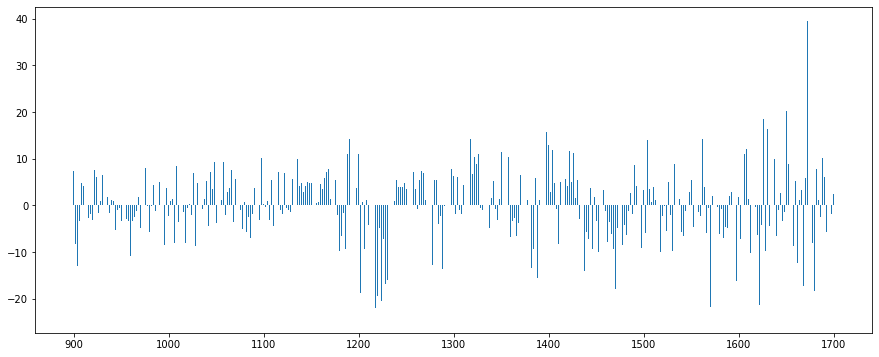

In [11]:
# Reunindo o nome da variavel ao seu coeficiente correspondente
#print(linearreg.coef_)
coeficiente_df= pd.DataFrame()
coeficiente_df["nomes_colunas"] = spectra.columns
coeficiente_df['valores'] = pd.DataFrame(linearreg.coef_).transpose()
# Apresentar os 10 primeiros coeficientes
coeficiente_df.head(10)

plt.rcParams["figure.figsize"] = (15,6)
plt.bar(coeficiente_df["nomes_colunas"],coeficiente_df['valores'])

# Ridge Regression

In [12]:
# Importanto ridge regression 

from sklearn.linear_model import Ridge

# Treinamento do modelo 

ridgeRegresssor = Ridge(alpha=0.001) # alpha eh equivalente ao lambda encontrado nas eqs analiticas

ridgeRegresssor.fit(predit_train,octane_train)

octane_predicted_ridge = ridgeRegresssor.predict(predit_test)


# Calculo do erro quadratico medio Mean Squared Error (MSE) para Ridge
R_squared_r = r2_score(octane_predicted_ridge,octane_test)

print('Erro quadratico medio ou Mean Squared Error (MSE) ridge:', R_squared)




Erro quadratico medio ou Mean Squared Error (MSE) ridge: 0.9493465980905045


Visualização de coeficientes obtidos por penalização ridge

<BarContainer object of 401 artists>

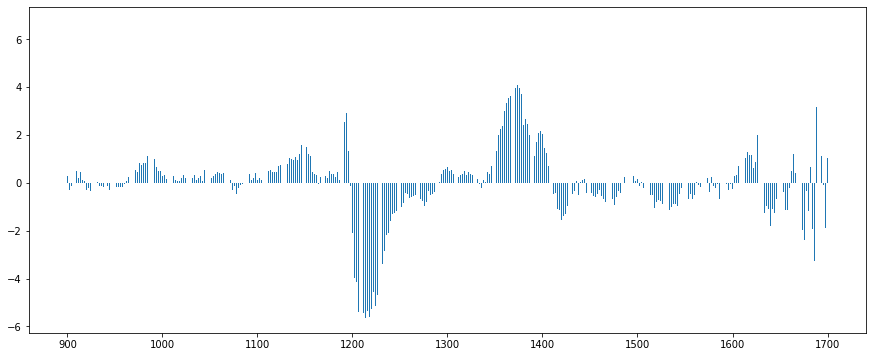

In [16]:
# Reunindo o nome da variavel ao seu coeficiente correspondente
#print(linearreg.coef_)
coeficiente_dfr = pd.DataFrame()
coeficiente_dfr["nomes_colunas"] = spectra.columns
coeficiente_dfr['valores'] = pd.DataFrame(ridgeRegresssor.coef_).transpose()
# Apresentar os 10 primeiros coeficientes
coeficiente_dfr.head(10)

plt.rcParams["figure.figsize"] = (15,6)
plt.bar(coeficiente_dfr["nomes_colunas"],coeficiente_dfr['valores'])

# Comparação de coeficientes obtidos por regularização ridge e regressão linear 

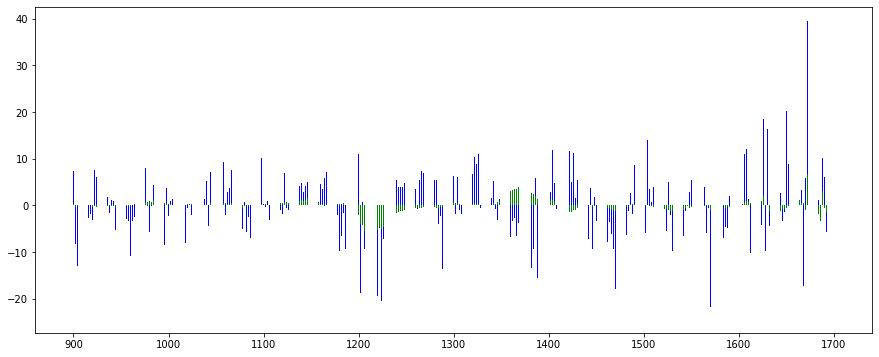

In [17]:
ax = plt.subplot(111)
ax.bar(coeficiente_df["nomes_colunas"],coeficiente_df['valores'], width=0.5, color='b', align='center')
ax.bar(coeficiente_dfr["nomes_colunas"],coeficiente_dfr['valores'], width=0.5, color='g', align='center')
#ax.bar(coeficiente_df["nomes_colunas"],coeficiente_df['valores'], width=0.5, color='r', align='center')
#ax.xaxis_date()

plt.show()

# Avaliação da distruição e relação com parâmetros obtidos por difeerentes abordagens

In [18]:
# Grafico de dispersao da abordagem classica vs ridge



def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')



    

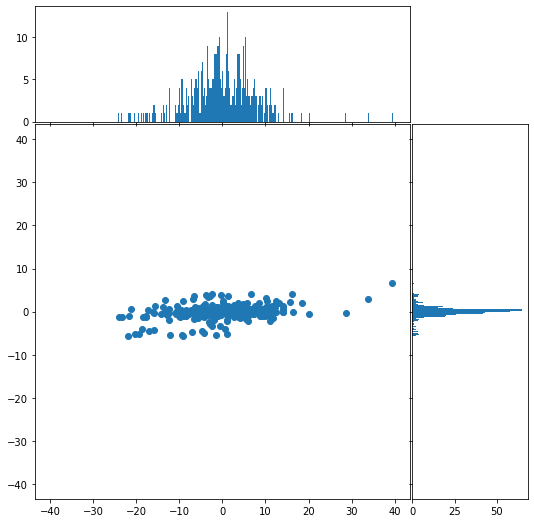

In [19]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(coeficiente_df.valores, coeficiente_dfr.valores, ax, ax_histx, ax_histy)

plt.show()

# Regularização por LASSO 

In [20]:
# Importar LASSO da biblioteca sklearn
from sklearn.linear_model import Lasso

# treinamento do modelo   

lassoRegressor = Lasso(alpha=0.0001)
lassoRegressor.fit(predit_train ,octane_train)

# Predicao
octane_predicted_lasso = lassoRegressor.predict(predit_test)

R_squared_l = r2_score(octane_predicted_lasso,octane_test)


print(R_squared_l)
print(lassoRegressor.coef_)


0.9695564181455774
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.302e-02, tolerance: 1.086e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         

<BarContainer object of 401 artists>

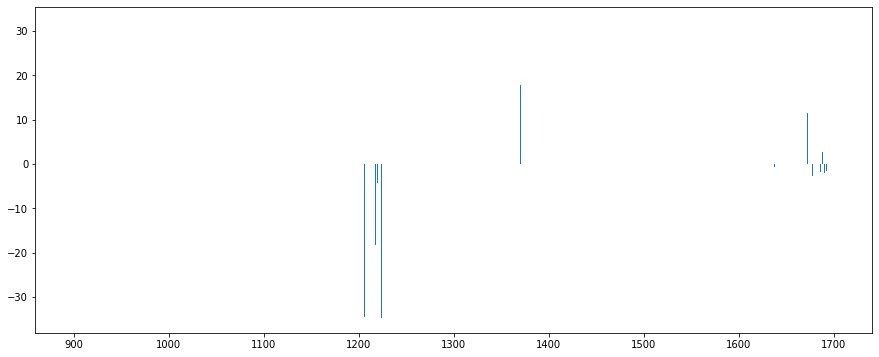

In [21]:
# Reunindo o nome da variavel ao seu coeficiente correspondente
#print(linearreg.coef_)
coeficiente_dfl = pd.DataFrame()
coeficiente_dfl["nomes_colunas"] = spectra.columns

lassoRegressor.coef_.shape
print(lassoRegressor.coef_)

coeficiente_dfl['valores'] = pd.DataFrame(lassoRegressor.coef_)
# Apresentar os 10 primeiros coeficientes
coeficiente_dfl.head(10)

plt.rcParams["figure.figsize"] = (15,6)
plt.bar(coeficiente_dfl["nomes_colunas"],coeficiente_dfl['valores'])

# Comparação do resultado das abordagens 

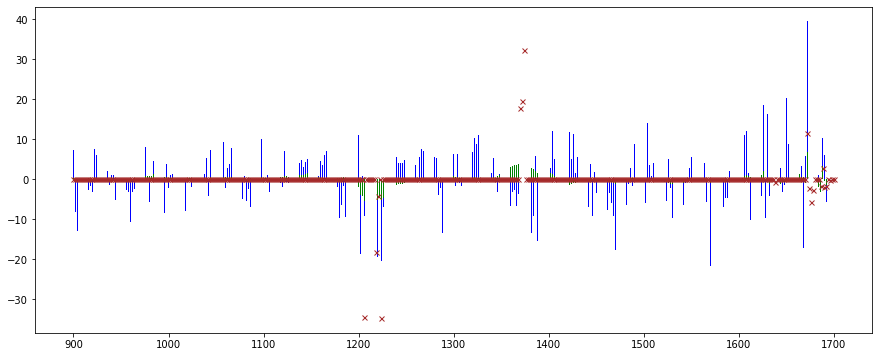

In [22]:
filled_marker_style = dict(marker='x', linestyle='none', markersize=5,
                           color='darkgrey',
                           markerfacecolor='none',
                           markerfacecoloralt='none',
                           markeredgecolor='brown')




ax = plt.subplot(111)
ax.bar(coeficiente_df["nomes_colunas"],coeficiente_df['valores'], width=0.5, color='b', align='center')
ax.bar(coeficiente_dfr["nomes_colunas"],coeficiente_dfr['valores'], width=0.5, color='g', align='center')
ax.plot(coeficiente_dfl["nomes_colunas"],coeficiente_dfl['valores'],**filled_marker_style)



plt.show()

# Relatório 

In [23]:
# Summarize the fit of the model


#mse = np.mean((octane_predicted_ridge-octane_test)**2)
print('Sem Regularização  ')
print(linearreg.intercept_)
print(linearreg.score(predit_train,octane_train))


print('Sem Regularização  teste')
print(linearreg.intercept_)
print(linearreg.score(predit_test,octane_test))

print('----------------------------')
print('Regularização Ridge')
print(ridgeRegresssor.intercept_)
print(ridgeRegresssor.score(predit_train,octane_train))

print('Regularização Ridge teste')
print(ridgeRegresssor.intercept_)
print(ridgeRegresssor.score(predit_test,octane_test))

print('----------------------------')
print('Regularização Lasso')
print(lassoRegressor.intercept_)
print(lassoRegressor.score(predit_train,octane_train))

print('Regularização Lasso')
print(lassoRegressor.intercept_)
print(lassoRegressor.score(predit_test,octane_test))




Sem Regularização  
[87.71373514]
1.0
Sem Regularização  teste
[87.71373514]
0.9447024861361566
----------------------------
Regularização Ridge
[89.57392567]
0.9924586174165957
Regularização Ridge teste
[89.57392567]
0.9785186133056725
----------------------------
Regularização Lasso
[91.91674194]
0.9921607185117348
Regularização Lasso
[91.91674194]
0.9661247918647449


# Comparação das estimativas do conjunto teste em relação ao valor medido de RON


    RON_M    RON_P_C    RON_P_R    RON_P_L
0   86.85  86.783224  86.932598  86.931262
1   88.25  88.575062  88.426456  88.440970
2   88.20  88.543087  88.404620  88.285937
3   88.40  88.207338  88.249934  88.141141
4   87.10  87.199112  87.058062  87.159782
5   85.50  85.817277  85.546602  85.529122
6   86.00  86.027573  86.053035  86.115801
7   87.15  87.608704  87.273001  87.010393
8   88.45  88.626507  88.337352  88.375445
9   84.50  84.461919  84.365871  84.374378
10  88.30  88.473630  88.491446  88.454762
11  87.90  87.550674  88.359171  88.633300
12  88.10  87.933653  88.011538  88.005721
13  88.25  88.713028  88.231453  88.302586
14  87.30  88.073998  87.686381  87.719405
15  88.40  88.360541  88.408404  88.363565
16  84.60  84.504635  84.355948  84.355867
17  86.30  86.387604  86.418550  86.413004


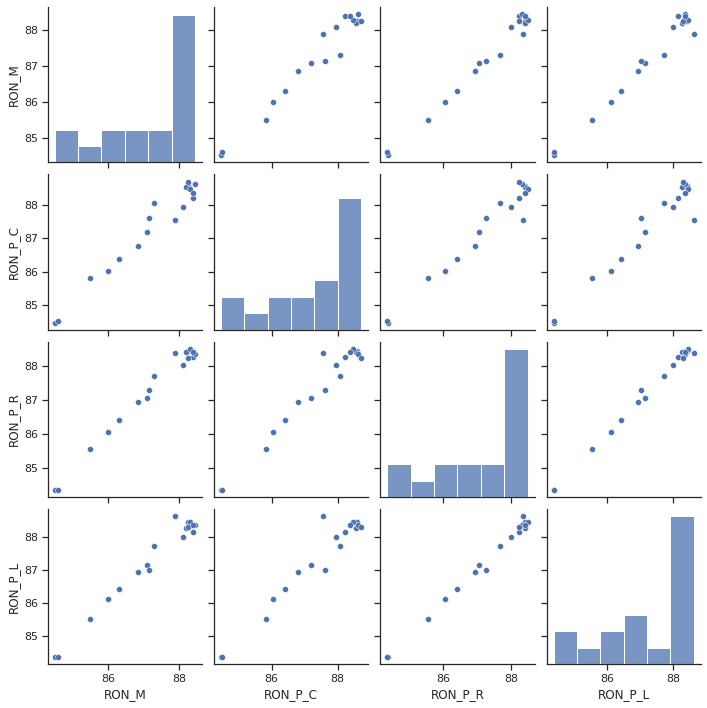

In [24]:
from functools import reduce

RON_M_test = reduce(lambda x,y: list(x)+list(y), octane_test.values)
RON_P_C = reduce(lambda x,y: list(x)+list(y), octane_predicted_classical)
RON_P_R = reduce(lambda x,y: list(x)+list(y), octane_predicted_ridge)
#RON_P_L = reduce(lambda x,y: list(x)+list(y), octane_predicted_lasso)

#print(octane_predicted_lasso)

RON_M_test = pd.Series(RON_M_test,name='RON_M')
RON_P_C = pd.Series(RON_P_C,name='RON_P_C')
RON_P_R = pd.Series(RON_P_R,name='RON_P_R')
RON_P_L = pd.Series(octane_predicted_lasso,name='RON_P_L')

df_P_all = pd.concat([RON_M_test,RON_P_C,RON_P_R,RON_P_L],axis=1,join='inner')

print(pd.DataFrame(df_P_all))

sns.set_theme(style="ticks")
sns.pairplot(df_P_all.loc[:,:])

# Desafio 

- Escolher uma propriedade do problema do milho disponível no link do repositório github:
- [Propriedades do milho](https://github.com/rpessoa1983/regularization/blob/master/properties_corn.csv)
e criar modelos de regressão utilizando regularização com as varriáveis preditoras dada pelo espectro infravermelho próximo também disponíveis no link do github:
- [Espectro NIR](https://github.com/rpessoa1983/regularization/blob/master/spectro_corn.csv).

Noo mesmo repositório está disponível o artigo que analisou estes dados originalmente [artigo](https://github.com/rpessoa1983/regularization/blob/master/1-s2.0-S0169743916302945-main.pdf).
